In [128]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks

In [27]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\PUND\BF4 PUND PE Heating\377.08.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms)
0,-4.5776,-4.5776,-0.889348,-0.008893,1.0,0.05
1,-6.1798,-6.1798,-0.887338,-0.008873,2.0,0.10
2,0.4578,0.4578,-0.882480,-0.008825,3.0,0.15
3,-0.9155,-0.9155,-0.876449,-0.008764,4.0,0.20
4,0.4578,0.4578,-0.869748,-0.008697,5.0,0.25
5,2.8992,2.8992,-0.866063,-0.008661,6.0,0.30
6,4.1962,4.1962,-0.860702,-0.008607,7.0,0.35
7,2.8992,2.8992,-0.854504,-0.008545,8.0,0.40
8,5.7220,5.7220,-0.848641,-0.008486,9.0,0.45
9,7.6294,7.6294,-0.843448,-0.008434,10.0,0.50


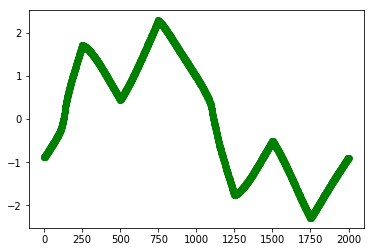

[ 251  750 1500]


,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms)
250,293.5791,293.5791,1.707166,0.017072,251.0,12.55
251,295.2576,295.2576,1.707501,0.017075,252.0,12.60
252,291.7480,291.7480,1.706998,0.017070,253.0,12.65
253,289.9170,289.9170,1.705658,0.017057,254.0,12.70
254,291.9769,291.9769,1.703983,0.017040,255.0,12.75
255,286.7889,286.7889,1.701638,0.017016,256.0,12.80
256,284.9579,284.9579,1.702643,0.017026,257.0,12.85
257,285.4919,285.4919,1.699963,0.017000,258.0,12.90
258,285.6445,285.6445,1.700465,0.017005,259.0,12.95
259,281.7535,281.7535,1.696947,0.016969,260.0,13.00


In [28]:
# 提取出P值的plot,并且找到前两个peak，然后做差，即得出 delta P，which is from leakgae only
P_value = df['Measured Polarization']
plt.plot(P_value,'go--')
plt.show()
indices = find_peaks(P_value, prominence=1)[0]
print(indices)

df[250:260]

# 因为找到的峰不止一个，为了保险起见，我选择将图像分段，0-500和500-1000个点为区间，分别找peak

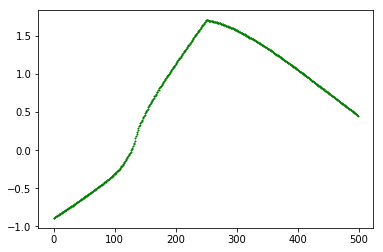

[251]


In [29]:
P_peak1 = P_value[0:500]
plt.plot(P_peak1, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index1 = find_peaks(P_peak1, prominence = 1)[0]
print(index1)

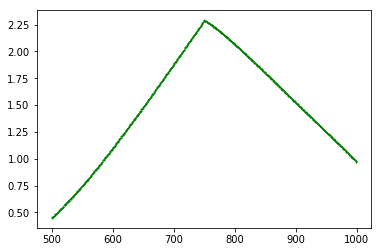

[750]


In [30]:
P_peak2 = P_value[500:1000]
plt.plot(P_peak2,color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index2 = find_peaks(P_peak2, prominence = 1)[0]+500  #要加上500，因为上一段有500个点
print(index2)

In [31]:
# print(type(index2))
# print(index2[0])
delta_P=df.ix[index2[0],'Measured Polarization']-df.ix[index1[0],'Measured Polarization']

print(type(delta_P))
print(delta_P)


<class 'numpy.float64'>
0.5837969999999999


C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


[ 0.00000000e+00 -2.68935000e-01 -4.11985000e-01 ... -4.41207927e+02
 -4.41434902e+02 -4.41616100e+02]


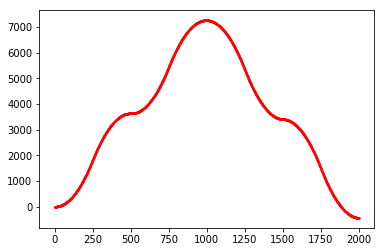

In [32]:
x = df['Time (ms)']
y = df['#Drive Voltage']
y_integration = integrate.cumtrapz(y, x, initial=0)
print(y_integration)
plt.plot(y_integration, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

In [33]:
#插入voltage的积分这一列
df.insert(len(df.columns), "Voltage Integration", y_integration)
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms),Voltage Integration
0,-4.5776,-4.5776,-0.889348,-0.008893,1.0,0.05,0.000000
1,-6.1798,-6.1798,-0.887338,-0.008873,2.0,0.10,-0.268935
2,0.4578,0.4578,-0.882480,-0.008825,3.0,0.15,-0.411985
3,-0.9155,-0.9155,-0.876449,-0.008764,4.0,0.20,-0.423428
4,0.4578,0.4578,-0.869748,-0.008697,5.0,0.25,-0.434870
5,2.8992,2.8992,-0.866063,-0.008661,6.0,0.30,-0.350945
6,4.1962,4.1962,-0.860702,-0.008607,7.0,0.35,-0.173560
7,2.8992,2.8992,-0.854504,-0.008545,8.0,0.40,0.003825
8,5.7220,5.7220,-0.848641,-0.008486,9.0,0.45,0.219355
9,7.6294,7.6294,-0.843448,-0.008434,10.0,0.50,0.553140


In [34]:
#求出从peak1 到 peak2的voltage积分的差值
delta_V_integral = df.ix[index2[0],'Voltage Integration']-df.ix[index1[0],'Voltage Integration']
print(delta_V_integral)
one_over_AR = delta_P/delta_V_integral
print(one_over_AR)

3614.175787500005
0.00016152977451155566


In [35]:
#with 1/AR, Volta_integration x 1/AR = 单纯电阻对 P 的贡献
P_fromR  = df['Voltage Integration']*one_over_AR
df.insert(len(df.columns), "P from R", P_fromR)
#用测量的 P 减去 P from R，即得到 P without conduction
P_corrected = df['Measured Polarization']-df['P from R']
df.insert(len(df.columns), "Corrected P", P_corrected)
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms),Voltage Integration,P from R,Corrected P
0,-4.5776,-4.5776,-0.889348,-0.008893,1.0,0.05,0.000000,0.000000e+00,-0.889348
1,-6.1798,-6.1798,-0.887338,-0.008873,2.0,0.10,-0.268935,-4.344101e-05,-0.887295
2,0.4578,0.4578,-0.882480,-0.008825,3.0,0.15,-0.411985,-6.654784e-05,-0.882413
3,-0.9155,-0.9155,-0.876449,-0.008764,4.0,0.20,-0.423428,-6.839615e-05,-0.876381
4,0.4578,0.4578,-0.869748,-0.008697,5.0,0.25,-0.434870,-7.024445e-05,-0.869678
5,2.8992,2.8992,-0.866063,-0.008661,6.0,0.30,-0.350945,-5.668807e-05,-0.866006
6,4.1962,4.1962,-0.860702,-0.008607,7.0,0.35,-0.173560,-2.803511e-05,-0.860674
7,2.8992,2.8992,-0.854504,-0.008545,8.0,0.40,0.003825,6.178514e-07,-0.854505
8,5.7220,5.7220,-0.848641,-0.008486,9.0,0.45,0.219355,3.543236e-05,-0.848676
9,7.6294,7.6294,-0.843448,-0.008434,10.0,0.50,0.553140,8.934858e-05,-0.843537


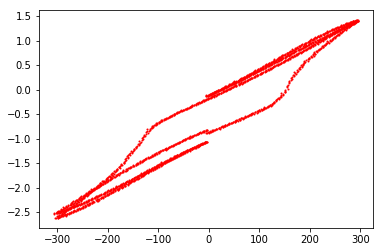

In [36]:
plt.plot(df['#Drive Voltage'], df['Corrected P'], color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

In [37]:
#剔除重叠的部分，删除500-1000行 以及 1500-2000行
P_positivepart= df.iloc[0:500]

P_negativepart= df.iloc[1000:1500]

New_df = P_positivepart.append(P_negativepart)
print(len(New_df))

1000


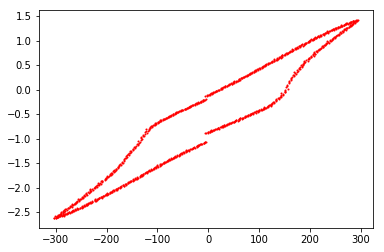

In [38]:
plt.plot(New_df['#Drive Voltage'], New_df['Corrected P'], color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

In [107]:
#r'C:\PhD-Zipeng\Research projects\PUND\1 - Copy.txt'
New_df.to_csv(r'C:\PhD-Zipeng\Research projects\PUND\380.90.csv', index=None)

In [133]:
#从文件名提取温度with regular expression
path = r'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[359.93, 360.05, 360.41, 360.8, 361.17, 361.4, 361.72, 362.03, 362.38, 362.65, 363.04, 363.37, 363.62, 363.96, 364.16, 364.54, 364.75, 364.92, 365.18, 365.41, 365.69, 365.92, 366.19, 366.35, 366.65, 366.91, 367.12, 367.4, 367.63, 367.89, 368.17, 368.4, 368.64, 368.88, 369.1, 369.37, 369.61, 369.91, 370.14, 370.39, 370.58, 370.89, 371.11, 371.37, 371.62, 371.83, 372.08, 372.33, 372.6, 372.82, 373.06, 373.35, 373.53, 373.79, 374.06, 374.3, 374.57, 374.79, 375.07, 375.27, 375.55, 375.77, 376.04, 376.31, 376.47, 376.82, 377.08, 377.25, 377.52, 377.9, 378.06, 378.34, 378.62, 378.88, 379.02, 379.25, 379.64, 379.79, 380.06, 380.29, 380.54, 380.79, 381.0, 381.36, 381.54, 381.84, 381.99, 382.38, 382.46, 382.79, 383.06, 383.32, 383.51, 383.8, 384.01, 384.35, 384.43, 384.8, 384.98, 385.23, 385.44, 385.74, 385.99, 386.22, 386.5, 386.64, 386.96, 387.2, 387.53, 387.73, 387.89, 388.26, 388.44, 388.7, 388.92, 389.22, 389.4, 389.61, 389.96, 390.13, 390.43, 390.63, 390.88, 391.16, 391.39, 391.69, 391.87

C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


             AR       T   delta P
0   9852.973099  359.93  0.366192
1  10950.234796  360.05  0.330511
2   9432.129479  360.41  0.382441


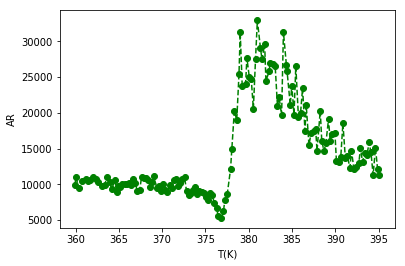

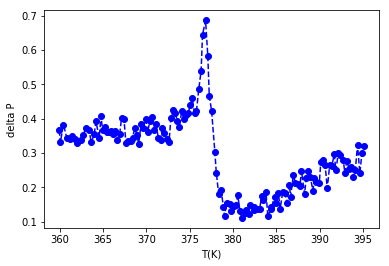

In [147]:
#批量操作所有文件
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating'
output_path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
files = glob(path + "/*.tab")

lst_AR=list()
lst_T=list()
lst_Pshift=list()
i = 0

for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    P_value = df['Measured Polarization']
    P_peak1 = P_value[0:500]
    index1 = find_peaks(P_peak1, prominence = 1)[0]
    P_peak2 = P_value[500:1000]
    index2 = find_peaks(P_peak2, prominence = 1)[0]+500
    ##插入voltage 积分
    x = df['Time (ms)']
    y = df['#Drive Voltage']
    y_integration = integrate.cumtrapz(y, x, initial=0)
    df.insert(len(df.columns), "Voltage Integration", y_integration)
    ##计算
    delta_V_integral = df.ix[index2[0],'Voltage Integration']-df.ix[index1[0],'Voltage Integration']
    delta_P=df.ix[index2[0],'Measured Polarization']-df.ix[index1[0],'Measured Polarization']
    one_over_AR = delta_P/delta_V_integral
    
    P_fromR  = df['Voltage Integration']*one_over_AR
    df.insert(len(df.columns), "P from R", P_fromR)
    
    P_corrected = df['Measured Polarization']-df['P from R']
    df.insert(len(df.columns), "Corrected P", P_corrected)
    
    P_positivepart= df.iloc[0:500]
    P_negativepart= df.iloc[1000:1500]
    New_df = P_positivepart.append(P_negativepart)

    file_name = output_path +'\\'+ str(temperature[i])+'.csv'
    New_df.to_csv(file_name, index=None)
    lst_AR.append(1/one_over_AR)
    lst_T.append(temperature[i])
    lst_Pshift.append(delta_P)
    i = i+1
    
    
# print(lst_AR)
# print(lst_T)
# print(lst_Pshift)

#将list转化成dictionary，然后转化成DataFrame
dic={"AR":lst_AR,
  "T":lst_T,
  "delta P":lst_Pshift}
dt=pd.DataFrame(dic)
print(dt.head(3))
plt.figure()
plt.plot(dt['T'],dt['AR'],'go--')
plt.xlabel('T(K)')
plt.ylabel('AR')
plt.figure()
plt.plot(dt['T'],dt['delta P'],'bo--') 
plt.xlabel('T(K)')
plt.ylabel('delta P')
plt.show()